In [102]:
import numpy as np
import sympy as sym
from matplotlib import pyplot as plt
import funciones

# **Punto 1**

### Punto 1.2

In [100]:
def corriente_bucle(t,r,Bo,f,omega):
    return np.pi*(r**2)*Bo*np.sin(omega*t)*np.cos(2*np.pi*f*t)

In [144]:
N = 1000
t = np.linspace(0,10,N)
r = 25/2
Bo=0.05
f = 1000
omega = 3.5
y = corriente_bucle(t,r,Bo,f,omega)

Text(0.5, 0, 'Time (t)')

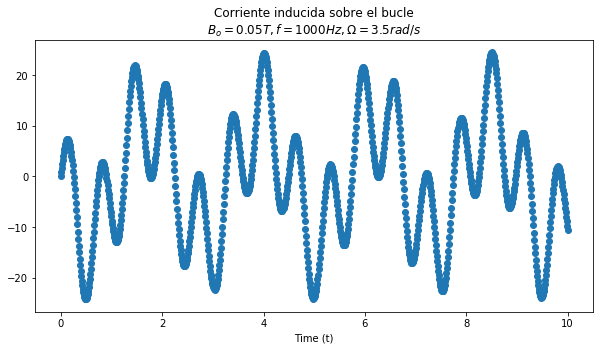

In [146]:
fig, ax = plt.subplots(figsize =(10,5))
ax.scatter(t,y)
ax.set_title("Corriente inducida sobre el bucle\n"+r"$B_o=0.05T,f =1000Hz,\Omega = 3.5rad/s$")
plt.xlabel("Time (t)")

#ax.set_title(r'$y = mx + c$', fontsize=14)

### Punto 1.3

# **Punto 3**

In [69]:
x = sym.Symbol('x',real=True)
n = 2

### Punto 3.1

In [70]:
def Legendre(n,x)->sym:
    '''Calcula el n-esimo polinomio de legendre'''
    y = (x**2 - 1)**n
    poly = sym.diff(y,x,n)/(2**n*np.math.factorial(n))

    return poly

### Punto 3.2

In [71]:
#Función auxiliar
def Dlegendre(poly,x)->sym:
  '''
  Calcula la derivada del poliniomio de legendre

    Parameters:
    (symbol) poly: El polinomio de legendre que se quiere derivar
  
  '''
  return sym.diff(poly,x,1)

In [82]:
poly = Legendre(n,x)
dpoly = Dlegendre(poly,x)

In [73]:
poly = sym.lambdify(x,poly,'numpy')
dpoly = sym.lambdify(x,dpoly,'numpy')

In [74]:
def ceros_legendre(poly,dfpoly,x,tolerancia=14):
    '''
    Calcula los ceros del polinomio de legendre recibido como argumento
    Parameters:
      (function) poly: El polinomio de legendre
      (function) dfpoly: La derivada del polinimio de legendre

    Returns:
      Arreglo con los ceros de poly
    '''
    Roots = np.array([])

    for i in x:

      root = funciones.GetNewton(poly,dfpoly,i)
    
      croot = np.round(root, tolerancia )
        
      if croot not in Roots:
          Roots = np.append(Roots, croot)

    Roots.sort()

    return Roots

In [79]:
xn = np.linspace(-1,1,100)
ceros_legendre(poly,dpoly,xn)

array([-0.57735027,  0.57735027])

### Punto 3.3

In [76]:
def pesos(n):
    xn = np.linspace(-1,1,100)
    
    pesos = np.array([])
    
    x = sym.Symbol('x',real=True)
    poly = Legendre(n,x)
    dpoly = Dlegendre(poly,x)
    
    poly = sym.lambdify(x,poly,'numpy')
    dpoly = sym.lambdify(x,dpoly,'numpy')
    
    ceros = ceros_legendre(poly,dpoly,xn,tolerancia=14)
    
    pesos = 2/((1-ceros**2)*(dpoly(ceros))**2)
    return pesos

### Punto 3.4

In [80]:
#pesos para el segundo polinomio de Legendre
pesos(2)

array([1., 1.])

In [81]:
#Ceros para el segundo polinomio de legendre
ceros_legendre(poly,dpoly,xn)

array([-0.57735027,  0.57735027])

### Punto 3.5

### Punto 3.6

In [84]:
V = sym.Symbol('V',real=True)

def Murnaghan(Bo,Boprima,Vo,V):
    return (Bo/Boprima)*((V/Vo)**(-Boprima)-1)
    

In [89]:
Bo =75.27
Boprima=4.63
Vo =285.92
Murnaghan(Bo,Boprima,Vo,V)

3832243734234.77*V**(-4.63) - 16.2570194384449

In [91]:
murnaghan = Murnaghan(Bo,Boprima,Vo,V)
sym.diff(murnaghan,V,1)

-17743288489507.0*V**(-5.63)